<div style="background-color: WHITE; COLOR: BLACK; padding: 10px; border: 1px BLACK;">
  <CENTER><COLOR="BLACK">AIML PROJECT</CENTER>
</div>


![Tobacco Charts](TABACCO.JPG)


In [82]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


IMPORT ALL LIBARIES

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [85]:

# Load the dataset from a local file
df = pd.read_csv("gyts4.csv")  

print(" Dataset loaded successfully!")
print(" Shape of dataset:", df.shape)
print("\n First 5 rows:")
print(df.head())


 Dataset loaded successfully!
 Shape of dataset: (108, 59)

 First 5 rows:
                      State/UT   Area  Ever tobacco users (%)  \
0                        India  Total                    18.1   
1                        India  Urban                    13.5   
2                        India  Rural                    19.5   
3  Andaman and Nicobar Islands  Total                    21.5   
4  Andaman and Nicobar Islands  Urban                    13.3   

   Current tobacco users (%)  Ever tobacco smokers (%)  \
0                        8.5                      11.0   
1                        5.5                       8.1   
2                        9.4                      11.8   
3                        4.4                       8.8   
4                        3.4                       6.5   

   Current tobacco smokers (%)  Ever cigarette users (%)  \
0                          7.3                       4.6   
1                          4.5                       4.1   
2    

In [86]:
df.info

<bound method DataFrame.info of                         State/UT   Area  Ever tobacco users (%)  \
0                          India  Total                    18.1   
1                          India  Urban                    13.5   
2                          India  Rural                    19.5   
3    Andaman and Nicobar Islands  Total                    21.5   
4    Andaman and Nicobar Islands  Urban                    13.3   
..                           ...    ...                     ...   
103                  Uttarakhand  Urban                    39.5   
104                  Uttarakhand  Rural                    28.2   
105                  West Bengal  Total                    17.3   
106                  West Bengal  Urban                    18.0   
107                  West Bengal  Rural                    17.2   

     Current tobacco users (%)  Ever tobacco smokers (%)  \
0                          8.5                      11.0   
1                          5.5             

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)


Missing values:
 State/UT                                                                                                                                 0
Area                                                                                                                                     0
Ever tobacco users (%)                                                                                                                   0
Current tobacco users (%)                                                                                                                0
Ever tobacco smokers (%)                                                                                                                 0
Current tobacco smokers (%)                                                                                                              0
Ever cigarette users (%)                                                                                                                 0
Current ci

The Random Forest model was successfully trained using the training data, preparing it to make predictions on unseen data.

# Filter for 'Total' Area and Select Features

In [90]:
# Only keep total (not Urban/Rural) for ML analysis
df_total = df[df['Area'] == 'Total'].copy()

# Select features to use
features = [
    'Ever tobacco users (%)',
    'Current tobacco users (%)',
    'Ever tobacco smokers (%)',
    'Current tobacco smokers (%)',
    'Ever smokeless tobacco users (%)',
    'Current smokeless tobacco users (%)'
]


# Create Target Label and Encode

In [91]:
# Create binary label: 'High' or 'Low' usage based on median
threshold = df_total['Current tobacco users (%)'].median()
df_total['Usage Category'] = df_total['Current tobacco users (%)'].apply(
    lambda x: 'High' if x > threshold else 'Low'
)

# Encode the label
le = LabelEncoder()
df_total['Usage Category Encoded'] = le.fit_transform(df_total['Usage Category'])


# Train/Test Split + Model Training + Evaluation

In [92]:
# Prepare input and output for ML model
X = df_total[features]
y = df_total['Usage Category Encoded']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))



=== Classification Report ===
              precision    recall  f1-score   support

        High       0.67      1.00      0.80         2
         Low       1.00      0.83      0.91         6

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



The Random Forest model learned from the data and made predictions on new data. The results show it did a good job identifying different usage categories, but some categories might need improvement. Overall, the model works well.



 # India National Usage Overview

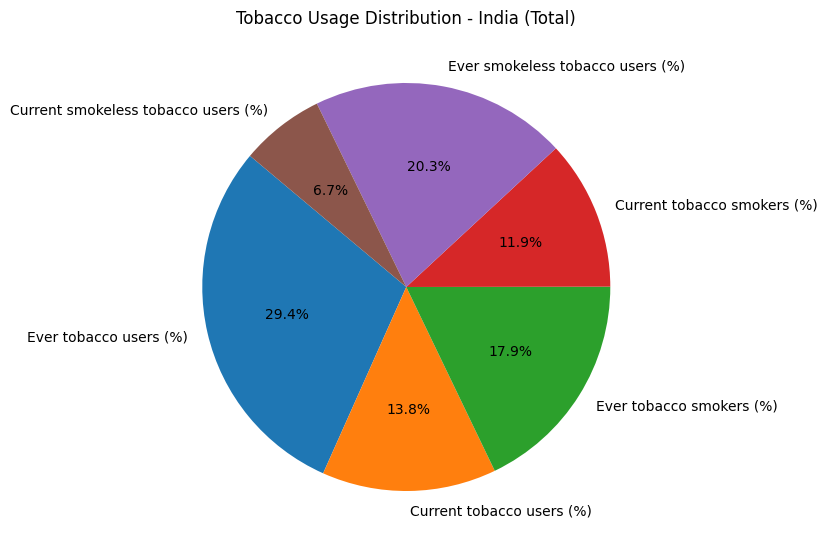

In [93]:
# Pie chart for national-level data (India - Total)
national_data = df[(df['State/UT'] == 'India') & (df['Area'] == 'Total')]

plt.figure(figsize=(8, 8))
plt.pie(
    national_data[features].values.flatten(),
    labels=features,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Tobacco Usage Distribution - India (Total)')
plt.tight_layout()
plt.show()


The pie chart shows the distribution of tobacco usage categories across India. It helps visualize which types of tobacco use are most common at the national level.

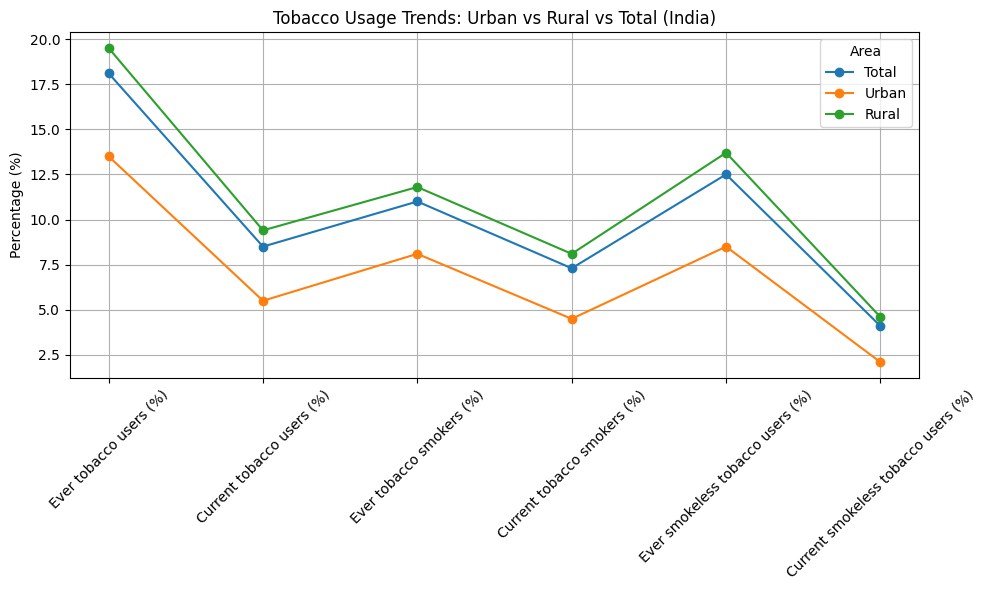

In [94]:
# Line chart comparing Urban, Rural, and Total for India
regional_data = df[df['State/UT'] == 'India'][['Area'] + features].set_index('Area').T

plt.figure(figsize=(10, 6))
for col in regional_data.columns:
    plt.plot(regional_data.index, regional_data[col], marker='o', label=col)

plt.title('Tobacco Usage Trends: Urban vs Rural vs Total (India)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.grid(True)
plt.tight_layout()
plt.show()


The line chart compares tobacco usage trends in Urban, Rural, and Total areas of India. It shows how tobacco use varies across these regions, highlighting differences and similarities in usage patterns.









# Current Tobacco Users (%) by State/UT

C:\Users\ibmuser\AppData\Local\Temp\ipykernel_21972\4261804058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Current tobacco users (%)', y='State/UT', data=sorted_df, palette='Reds_r')


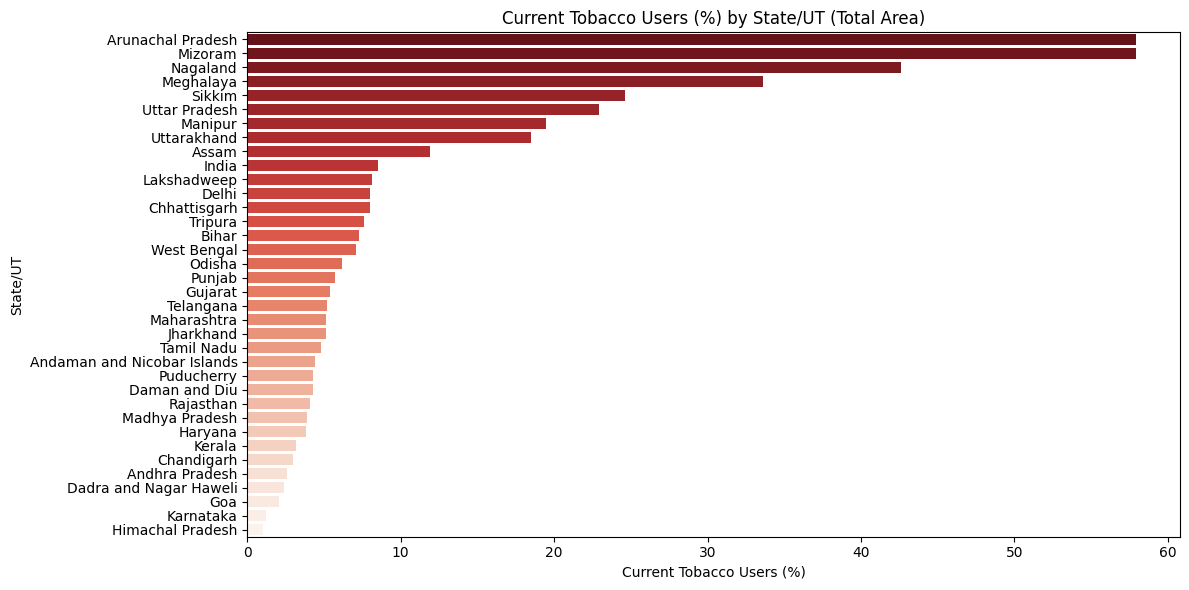

In [95]:

plt.figure(figsize=(12, 6))
sorted_df = df_total.sort_values('Current tobacco users (%)', ascending=False)
sns.barplot(x='Current tobacco users (%)', y='State/UT', data=sorted_df, palette='Reds_r')
plt.title('Current Tobacco Users (%) by State/UT (Total Area)')
plt.xlabel('Current Tobacco Users (%)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


The bar chart shows the percentage of current tobacco users across different states and union territories in India. It highlights which regions have higher or lower tobacco usage rates.

# Compare All Tobacco Usage Types

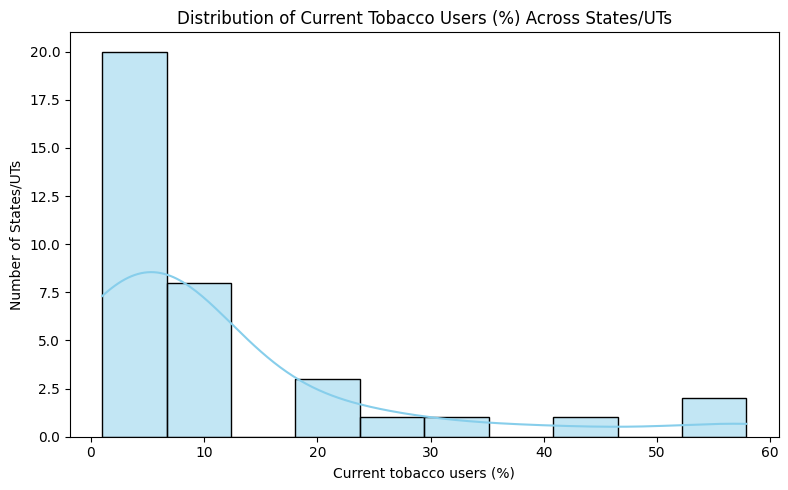

In [96]:
plt.figure(figsize=(8, 5))
sns.histplot(df_total['Current tobacco users (%)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Current Tobacco Users (%) Across States/UTs')
plt.xlabel('Current tobacco users (%)')
plt.ylabel('Number of States/UTs')
plt.tight_layout()
plt.show()


The histogram shows how the percentage of current tobacco users is distributed across different states and union territories. Most states have tobacco usage percentages clustered around the middle range.

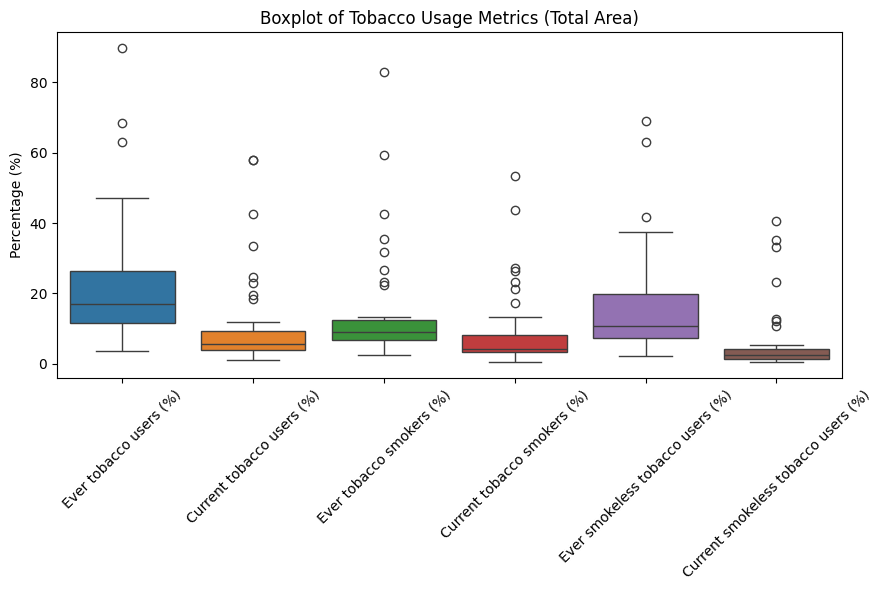

In [102]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df_total[features])
plt.title('Boxplot of Tobacco Usage Metrics (Total Area)')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()


 #  Relationship Between Features python Copy code


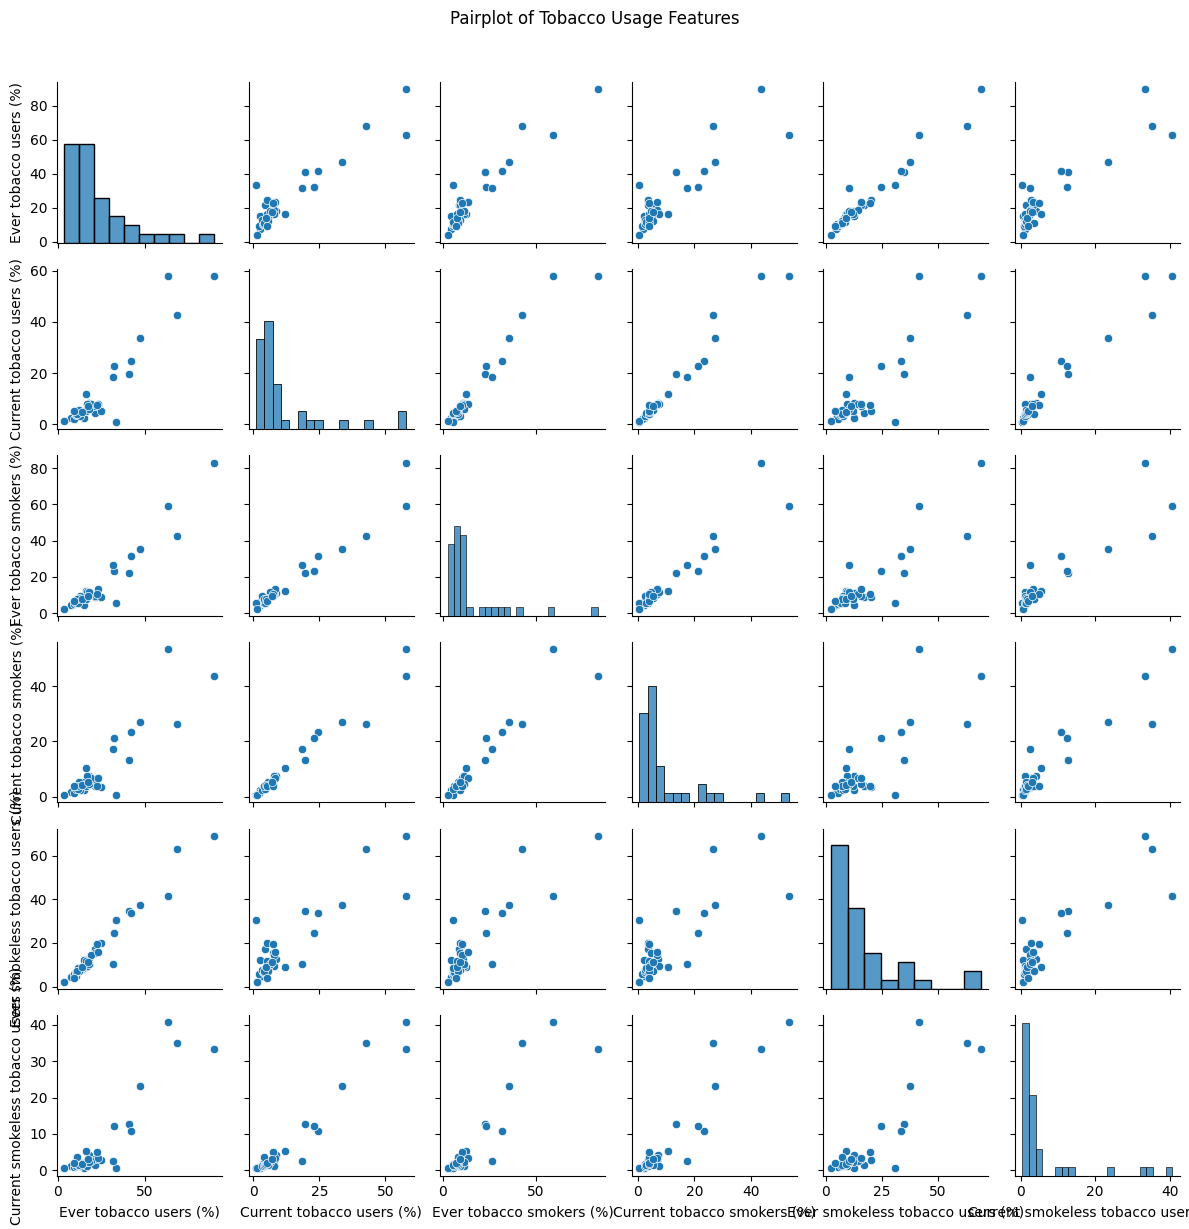

In [109]:
sns.pairplot(df_total[features], height=2)
plt.suptitle('Pairplot of Tobacco Usage Features', y=1.02)
plt.tight_layout()
plt.show()


The compact pairplot provides a clear overview of how different tobacco usage features relate to each other, aiding quick visual analysis.